In [1]:
%load_ext autoreload
%autoreload 2
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings("ignore")

import sys, os, json, gc
import numpy as np, pandas as pd, itertools
import datetime, time, calendar
from itertools import groupby
from operator import itemgetter

notebook_path = os.path.abspath(os.getcwd())
base_path = os.path.dirname(notebook_path)
sys.path.append(base_path)

from src.LoadDataGenerator import DataCleaner, LargeScaleDataGenerator
from src import utilities as util

import matplotlib.pyplot as plt
%matplotlib inline

D:\GithubRepos\CCMT-NILM\code\NILMAlgorithm


## Cleaning Real House Load Data from Public Datasets and Prepare Baseline Dataset

In [2]:
# initialization of data cleaner
ObjDataCleaner = DataCleaner(datatimestamp_splitsize = 1) 

Data is to be retrieved from 11 unique load ids.


In [3]:
# clean and prepared the baseline daily cleaned load data ref dataset and save it for later uses in large-scale laod generation
ObjDataCleaner.GenerateCleanedDataDbRef()

######################################################################
houseid: 1
corrupted_data: size=10
                 timestamp  diff_timestamp  diff_timestamp_hours
31417  2011-04-20 02:20:09 0 days 01:35:00              1.583333
60391  2011-04-21 12:17:22 0 days 03:00:16              3.004444
70839  2011-04-22 01:41:30 0 days 01:56:28              1.941111
214816 2011-04-30 05:10:38 1 days 17:12:51             41.214167
297303 2011-05-06 16:52:31 2 days 17:19:14             65.320556
('Number of cleaned days: ', 10)
######################################################################
houseid: 2
corrupted_data: size=3
                 timestamp   diff_timestamp  diff_timestamp_hours
39370  2011-04-20 02:20:08  0 days 01:35:02              1.583889
82742  2011-04-22 01:41:35  0 days 01:56:27              1.940833
312987 2011-05-22 21:57:07 20 days 16:52:29            496.874722
('Number of cleaned days: ', 11)
#####################################################################

In [4]:
# load the generated cleaned load dataset
cleaneddata_db_ref = ObjDataCleaner.LoadCleanedDataDbRef()

In [5]:
# display house load dataset info
ObjDataCleaner.DisplayInfo()

houseIds: [1, 2, 3, 4, 5, 6, 9001, 9002, 9003, 9004, 9005]
start_datetimes: ['2011-04-18 15:22:13', '2011-04-18 07:31:40', '2011-04-16 07:11:30', '2011-04-17 03:16:32', '2011-04-18 06:24:07', '2011-05-21 21:39:51', '2013-05-16 16:07:46', '2013-05-16 16:07:46', '2013-05-16 16:07:46', '2013-05-16 16:07:46', '2013-05-16 16:07:46']
end_datetimes: ['2011-05-24 21:56:34', '2011-05-23 01:59:08', '2011-05-31 02:19:36', '2011-06-04 02:45:38', '2011-06-01 02:20:14', '2011-06-14 03:12:36', '2013-05-23 16:07:40', '2013-05-23 16:07:46', '2013-05-17 3:45:00', '2013-05-23 16:07:45', '2013-05-22 16:07:40']
cleaneddata_db_ref_filename: D:\GithubRepos\CCMT-NILM\code\data\cleaneddata_db_ref.csv


,houseid,start_datetime,end_datetime,mains_power_min,mains_power_avg,mains_power_median,mains_power_max
0,1,2011-04-19 00:00:00,2011-04-19 23:59:57,171.0,401.59563,255.0,5866.0
1,1,2011-04-23 00:00:00,2011-04-23 23:59:57,92.0,503.75132,243.0,7459.0
2,1,2011-04-24 00:00:00,2011-04-24 23:59:58,95.0,690.29936,180.0,7613.0
3,1,2011-04-25 00:00:01,2011-04-25 23:59:57,93.0,273.54662,173.0,3152.0
4,1,2011-04-26 00:00:01,2011-04-26 23:59:58,92.0,345.84542,241.0,3555.0
5,1,2011-04-27 00:00:02,2011-04-27 23:59:58,93.0,236.18293,170.0,2927.0
6,1,2011-05-01 00:00:03,2011-05-01 23:59:59,91.0,433.38376,240.0,8852.0
7,1,2011-05-02 00:00:08,2011-05-02 23:59:56,90.0,312.70716,167.0,8131.0
8,1,2011-05-03 00:00:00,2011-05-03 23:33:17,89.0,294.46581,172.0,2181.0
9,1,2011-05-12 00:00:02,2011-05-12 23:48:31,92.0,194.14970,130.0,3196.0


Plot timestamp splits for house id 3 ...


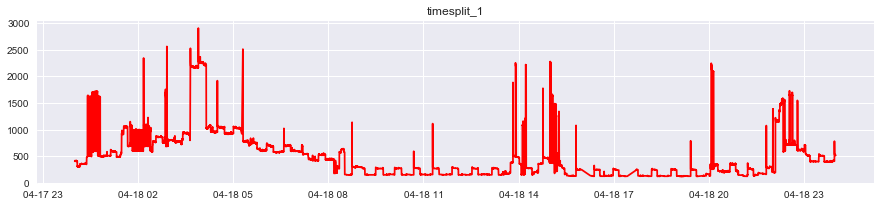

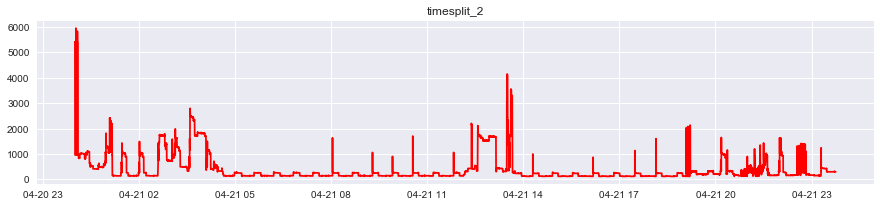

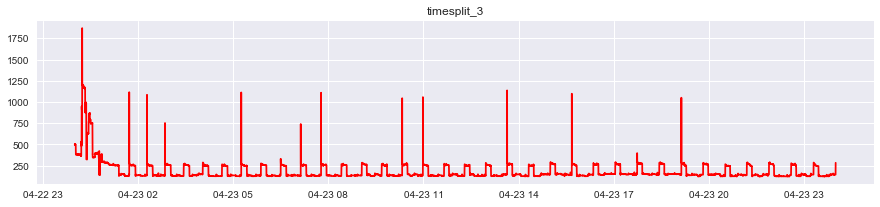

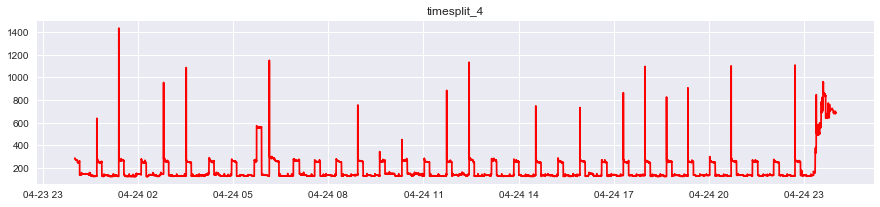

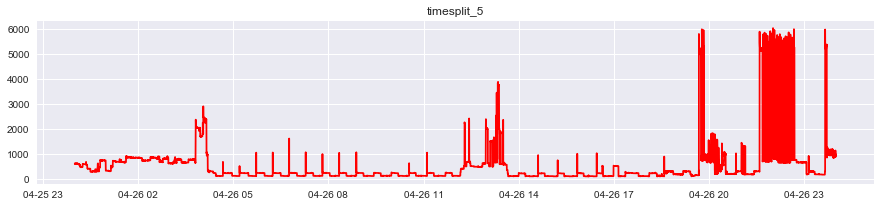

Plot timestamp splits for house id 9004 ...


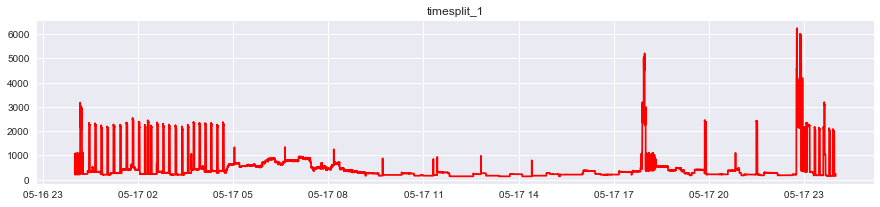

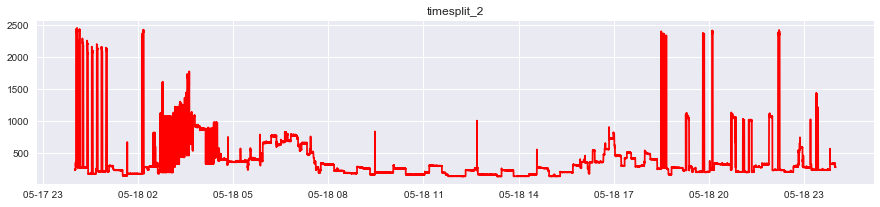

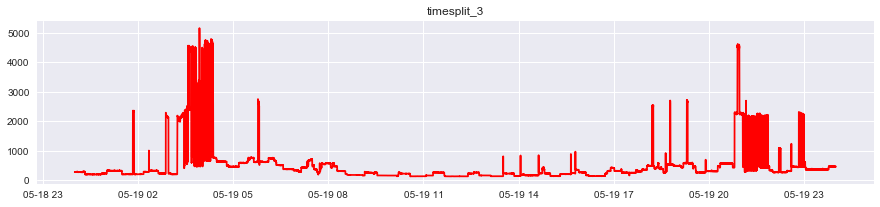

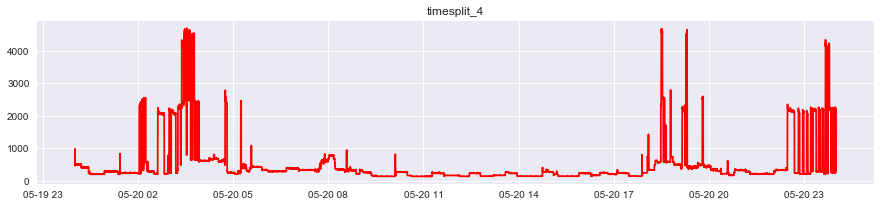

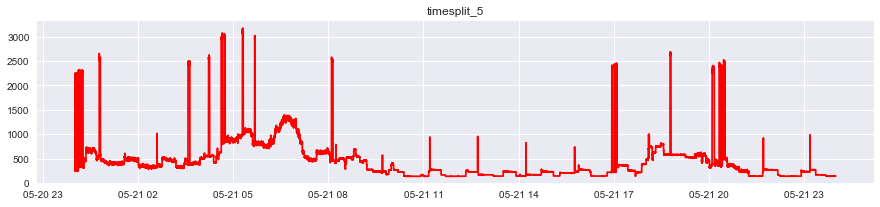

In [6]:
#sample house load plot
plt.rcParams['figure.figsize'] = (15,  3)
ObjDataCleaner.PlotSplitedData(houseids= [3, 9004], max_figs=5)

## Large Scale Load Data Generation

In [7]:
# generate large scale houses loads for the given maximum number of houses and NILM algorithm's disaggregation window
loadscale_size = 2500 # target large scale house load
disaggtimewindow = 60 #  the NILM algorithm disaggregation window in minutes
ObjDataGenerator = LargeScaleDataGenerator(timewindow_slicesize=disaggtimewindow, timewindow_unit=0, isshuffle=True)
ObjDataGenerator.LargeScaleLoadData(target_datasize=loadscale_size)

Data is to be retrieved from 11 unique load ids.
Generating experimental data for the given maximum number of houses...
('Number of baseline houses generated using the disaggrgation time slot: ', 1872)
('Number of generated duplicated houses for the experiment: ', 3744)


In [8]:
# dispace the generated large scale load data db ref
large_loaddata = pd.DataFrame.from_dict(ObjDataGenerator.data_db_ref_ts_dp, orient='index')
large_loaddata["houseid (dbid_dayid_dwid)"] = ObjDataGenerator.house_ids_all_org_ts_dp
large_loaddata.rename(columns={0:'start_time', 1:'end_time'}, inplace=True)

large_loaddata.head(10)
large_loaddata.shape

,start_time,end_time,houseid (dbid_dayid_dwid)
1,2011-04-28 08:00:03,2011-04-28 09:00:03,4__3__9
2,2011-04-27 19:00:00,2011-04-27 20:00:00,3__5__20
3,2011-04-28 12:00:03,2011-04-28 13:00:03,4__3__13
4,2013-05-20 07:00:04,2013-05-20 08:00:04,9003__3__8
5,2011-05-01 05:00:01,2011-05-01 06:00:01,4__5__6
6,2011-04-27 18:00:01,2011-04-27 19:00:01,4__2__19
7,2013-05-18 20:00:04,2013-05-18 21:00:04,9003__1__21
8,2011-04-27 23:00:00,2011-04-27 23:59:53,3__5__24
9,2013-05-18 03:00:04,2013-05-18 04:00:04,9001__1__4
10,2011-06-13 07:00:07,2011-06-13 08:00:07,6__7__8


(3744, 3)